In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import glob

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
def load_preprocess(path):
    normal = glob.glob(f'{path}/NORMAL/*')
    pneumonia = glob.glob(f'{path}/PNEUMONIA/*')
    X = []
    y = []
    
    for i in normal:
        img = cv2.imread(i, 0)
        img = cv2.resize(img, (128, 128))
        img = img/255
        img = np.expand_dims(img, axis=-1)  # Add a channel dimension
        X.append(img)
        y.append(0)
        
    for i in pneumonia:
        img = cv2.imread(i, 0)
        img = cv2.resize(img, (128, 128))
        img = img/255
        img = np.expand_dims(img, axis=-1)  # Add a channel dimension
        X.append(img)
        y.append(1)
        
    return X, y

X_train, y_train = load_preprocess('dataset/chest_xray/train')
X_val, y_val = load_preprocess('dataset/chest_xray/val')
X_test, y_test = load_preprocess('dataset/chest_xray/test')

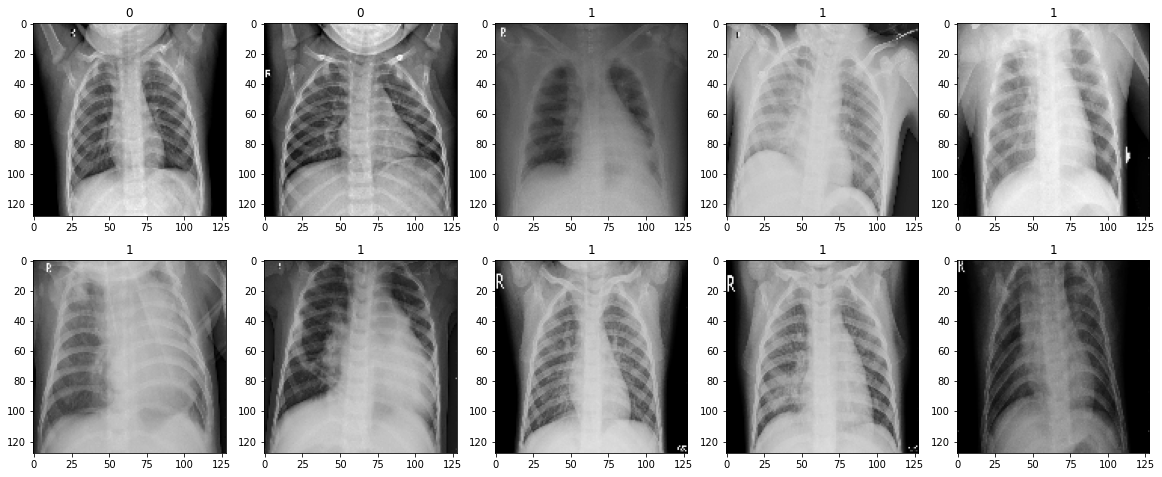

In [3]:
plt.figure(figsize=(20,8))
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(X_train[i*500],'gray')
    plt.title(y_train[i*500])
        
plt.show()

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)
X_train = np.asarray(X_train)
X_val = np.asarray(X_val)
X_test = np.asarray(X_test)


In [5]:
model = models.Sequential()
model.add(layers.Conv2D(128,(4,4), padding='same', strides=1, activation='relu',input_shape=X_train[0].shape))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(8,(4,4), padding='same', strides=1, activation='relu',input_shape=X_train[0].shape))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(4,4), padding='same', strides=1, activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(32,(3,3), padding='same', strides=1, activation='relu',input_shape=X_train[0].shape))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(16,(3,3), padding='same', strides=1, activation='relu',input_shape=X_train[0].shape))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(80, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary(256)


Model: "sequential"
________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
 Layer (type)                                                                                                      Output Shape                                                                                          Param #                                
 conv2d (Conv2D)                                                                                                   (None, 128, 128, 128)                                                                                 2176                                   
                                                                                                                                                                                                                 

                                                                                                                                                                                                                                                                
 dense_3 (Dense)                                                                                                   (None, 50)                                                                                            4050                                   
                                                                                                                                                                                                                                                                
 dense_4 (Dense)                                                                                                   (None, 25)                                                                                            1275        

In [6]:
metrics = [
    'accuracy',
    tf.metrics.Precision(name='precision'),
    tf.metrics.Recall(name='recall')
]
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=metrics)
model.fit(X_train, y_train, epochs=10,validation_data=(X_val,y_val))

Epoch 1/10
163/163 [==============================] - 277s 2s/step - loss: 0.5029 - accuracy: 0.7429 - precision: 0.7429 - recall: 0.7429 - val_loss: 0.7867 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 0.5000
Epoch 2/10
163/163 [==============================] - 267s 2s/step - loss: 0.2813 - accuracy: 0.9082 - precision: 0.9082 - recall: 0.9082 - val_loss: 0.7503 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125
Epoch 3/10
163/163 [==============================] - 281s 2s/step - loss: 0.2473 - accuracy: 0.9285 - precision: 0.9285 - recall: 0.9285 - val_loss: 0.4224 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750
Epoch 4/10
163/163 [==============================] - 259s 2s/step - loss: 0.2153 - accuracy: 0.9463 - precision: 0.9463 - recall: 0.9463 - val_loss: 0.3697 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750
Epoch 5/10
163/163 [==============================] - 245s 2s/step - loss: 0.2004 - accuracy: 0.9507

In [7]:
model.evaluate(X_test,y_test)

20/20 [==============================] - 6s 278ms/step - loss: 1.8091 - accuracy: 0.7596 - precision: 0.7596 - recall: 0.7596


[1.80913507938385, 0.7596153616905212, 0.7596153616905212, 0.7596153616905212]

20/20 [==============================] - 17s 586ms/step
              precision    recall  f1-score   support

           0       0.94      0.38      0.55       234
           1       0.73      0.98      0.84       390

    accuracy                           0.76       624
   macro avg       0.83      0.68      0.69       624
weighted avg       0.81      0.76      0.73       624



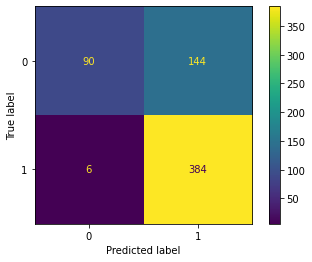

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

y_test_hat = np.argmax(model.predict(X_test), axis=1)
y_test = np.argmax(y_test, axis=1)

ConfusionMatrixDisplay.from_predictions(y_test, y_test_hat)

print(classification_report(y_test, y_test_hat))

In [9]:
def load_preprocess(img_path):
    img = cv2.imread(img_path, 0)
    img = cv2.resize(img, (128, 128))
    img = img/255
    img = np.expand_dims(img, axis=-1)
    img = img.reshape((1,)+img.shape)
    return img

x = load_preprocess('testing-samples/chest-x-ray.jpg')
model.predict(x)

1/1 [==============================] - 0s 141ms/step


array([[0.08236884, 0.91763115]], dtype=float32)

In [10]:
x = load_preprocess('testing-samples/normal-x-ray.jpg')
print(max(model.predict(x)[0]))
if(np.argmax(model.predict(x))==1):
    print ("Pneumonia Detected")
else : 
    print ("Normal")

1/1 [==============================] - 0s 259ms/step
0.748717
1/1 [==============================] - 0s 130ms/step
Normal


In [11]:
model.save('pneumonia.h5')

In [12]:
model.save('pneumonia.pkl')

INFO:tensorflow:Assets written to: pneumonia.pkl\assets


INFO:tensorflow:Assets written to: pneumonia.pkl\assets
